# Cat And Dog Classifier using CNN and Transfer Learning ResNet

## Abstract
This project focuses on using CNN models to do image recognition of cat and dogs. Dataset was extracted from zenodo (https://zenodo.org/records/5226945)  and Simple CNN model was used.
For transfer learning we decided to go with ResNet 50 and we got an accuracy of 88% this can be increased but the dataset which was available was small.

# Extracting Data

In [2]:
#Importing necessary libraries
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers, models

In [3]:
data = tf.keras.utils.image_dataset_from_directory("cats_dogs_light", batch_size=64) #Extracting classes from the dataset

Found 1400 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator() #Extrating data in the form of numpy iterators to get the data in the form of batches

In [5]:
batch = data_iterator.next()

In [6]:
batch

(array([[[[216.81578   , 157.81578   ,  63.81578   ],
          [215.99016   , 156.99016   ,  62.990158  ],
          [215.98047   , 156.98047   ,  62.98047   ],
          ...,
          [163.51404   , 151.51404   , 125.51404   ],
          [172.87733   , 160.87733   , 134.87733   ],
          [171.53188   , 159.53188   , 133.53188   ]],
 
         [[215.99016   , 156.99016   ,  62.990158  ],
          [215.46703   , 156.46703   ,  62.467026  ],
          [215.        , 156.        ,  62.        ],
          ...,
          [167.14139   , 155.14139   , 129.14139   ],
          [167.35765   , 155.35765   , 129.35765   ],
          [164.37688   , 152.37688   , 126.37688   ]],
 
         [[215.75078   , 156.75078   ,  62.75078   ],
          [214.95079   , 155.95079   ,  61.95079   ],
          [214.90234   , 155.90234   ,  61.902344  ],
          ...,
          [166.75401   , 154.75401   , 128.75401   ],
          [165.83522   , 153.83522   , 127.83522   ],
          [163.67032   , 151.67

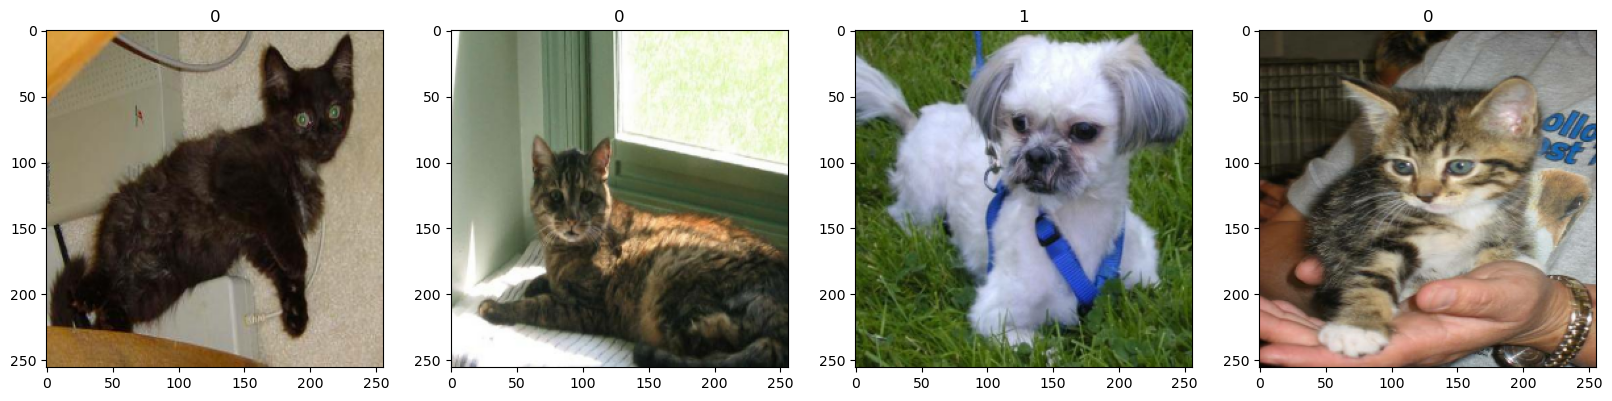

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing

In [8]:
data = data.map(lambda x, y: (x/255, y)) #Normalisation of data

In [9]:
scaled_iterator = data.as_numpy_iterator() # Converting this into a scaled numpy iterator again so that we can feed it into the model

In [10]:
scaled_iterator.next()

(array([[[[0.02745098, 0.02745098, 0.02745098],
          [0.03063725, 0.03063725, 0.03063725],
          [0.0379902 , 0.0379902 , 0.0379902 ],
          ...,
          [0.17389706, 0.1346201 , 0.04705882],
          [0.17022058, 0.13645834, 0.04705882],
          [0.16862746, 0.13725491, 0.04705882]],
 
         [[0.02914369, 0.02914369, 0.02914369],
          [0.03198613, 0.03198613, 0.03198613],
          [0.03854562, 0.03854562, 0.03854562],
          ...,
          [0.17389706, 0.1346201 , 0.04705882],
          [0.17022058, 0.13645834, 0.04705882],
          [0.16862746, 0.13725491, 0.04705882]],
 
         [[0.03178615, 0.03178615, 0.03178615],
          [0.03404984, 0.03404984, 0.03404984],
          [0.03927373, 0.03927373, 0.03927373],
          ...,
          [0.17389706, 0.1346201 , 0.04705882],
          [0.17022058, 0.13645834, 0.04705882],
          [0.16862746, 0.13725491, 0.04705882]],
 
         ...,
 
         [[0.02064951, 0.02457108, 0.04025735],
          [0.01653

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) # Splitting dataset into a 70/20 split and 10 for validation

In [12]:
train_size, val_size, test_size

(15, 4, 2)

In [13]:
len(data)

22

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size) # Forming train test and val dataset

# Model Training and Evaluation

In [15]:
input_shape = (256, 256, 3)
num_classes = 2
epochs = 50

# Model definition
def SimpleCNN(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.4),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid') # 1 in the output layer because we are doing a binary classification
    ])
    return model

model = SimpleCNN(input_shape, num_classes)
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(), # Binary Cross Entropy because binary classification model
              metrics=['accuracy'])

# Model training
history = model.fit(
    train,
    epochs=epochs,
    validation_data=val
)

# Save the model
model.save('SimpleCNN.keras')


Epoch 1/50
15/15 [==============================] - 11s 247ms/step - loss: 8.6165 - accuracy: 0.4969 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 2/50
15/15 [==============================] - 3s 218ms/step - loss: 0.7275 - accuracy: 0.5010 - val_loss: 0.6930 - val_accuracy: 0.5586
Epoch 3/50
15/15 [==============================] - 3s 204ms/step - loss: 0.6918 - accuracy: 0.5240 - val_loss: 0.6926 - val_accuracy: 0.5898
Epoch 4/50
15/15 [==============================] - 3s 206ms/step - loss: 0.6908 - accuracy: 0.5510 - val_loss: 0.6929 - val_accuracy: 0.5352
Epoch 5/50
15/15 [==============================] - 3s 203ms/step - loss: 0.6887 - accuracy: 0.5302 - val_loss: 0.6928 - val_accuracy: 0.5234
Epoch 6/50
15/15 [==============================] - 3s 207ms/step - loss: 0.6777 - accuracy: 0.5719 - val_loss: 0.6914 - val_accuracy: 0.6094
Epoch 7/50
15/15 [==============================] - 3s 207ms/step - loss: 0.6628 - accuracy: 0.6010 - val_loss: 0.6662 - val_accuracy: 0.6797
Epoch

In [16]:
model.summary() # Printing Model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0

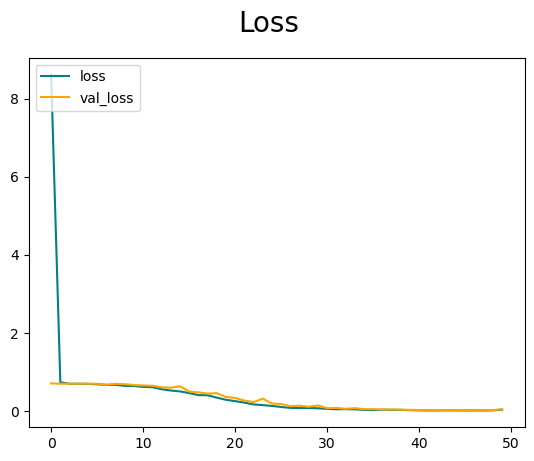

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show() #plotting loss curves

In [18]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat) #Evaluating Precision of the model
    re.update_state(y, yhat) #Evaluating Recall of the model
    acc.update_state(y, yhat) #Evaluating Accuracy of the model
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

2/2 [==============================] - 0s 26ms/step
Precision: 0.9857142567634583, Recall: 1.0, Accuracy: 0.9921875


In [21]:
def ResNet50(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze the convolutional base
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


model = ResNet50(input_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Model training
history = model.fit(
    train,
    epochs=50,
    validation_data=val
)

# Save the model
model.save('ResNet50.keras')

Epoch 1/50
15/15 [==============================] - 12s 433ms/step - loss: 24.2303 - accuracy: 0.5115 - val_loss: 1.2428 - val_accuracy: 0.4922
Epoch 2/50
15/15 [==============================] - 5s 326ms/step - loss: 0.7997 - accuracy: 0.5156 - val_loss: 0.6823 - val_accuracy: 0.5781
Epoch 3/50
15/15 [==============================] - 5s 321ms/step - loss: 0.7271 - accuracy: 0.5333 - val_loss: 0.6712 - val_accuracy: 0.6016
Epoch 4/50
15/15 [==============================] - 5s 318ms/step - loss: 0.6855 - accuracy: 0.5323 - val_loss: 0.6776 - val_accuracy: 0.5117
Epoch 5/50
15/15 [==============================] - 5s 321ms/step - loss: 0.6675 - accuracy: 0.5698 - val_loss: 0.6438 - val_accuracy: 0.6484
Epoch 6/50
15/15 [==============================] - 5s 318ms/step - loss: 0.6758 - accuracy: 0.5635 - val_loss: 0.6377 - val_accuracy: 0.6602
Epoch 7/50
15/15 [==============================] - 5s 327ms/step - loss: 0.6604 - accuracy: 0.5958 - val_loss: 0.6562 - val_accuracy: 0.5781
Epoc

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat) #Evaluating Precision of the model
    re.update_state(y, yhat) #Evaluating Recall of the model
    acc.update_state(y, yhat) #Evaluating Accuracy of the model
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

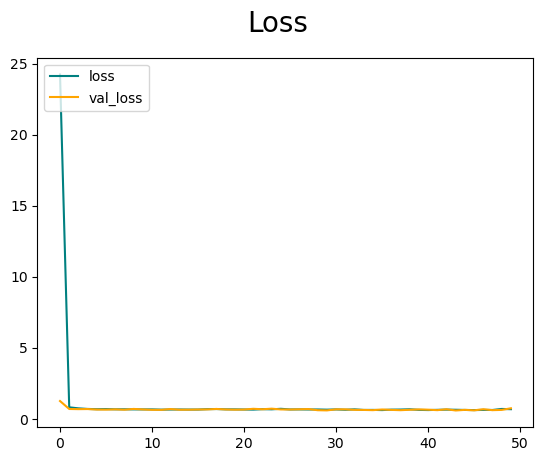

In [23]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Result

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import BinaryAccuracy
model_names = ["SimpleCNN","ResNet50"]

acc = BinaryAccuracy()
for name in model_names:
    # Load the model
    model_path = f'{name}.keras'
    model = load_model(model_path)

    # Evaluate the model
    for batch in test.as_numpy_iterator():
        X, y = batch
        yhat = model.predict(X)
        acc.update_state(y, yhat) #Evaluating Accuracy of the model
        print(f'{name} is having Accuracy: {acc.result().numpy()}')



2/2 [==============================] - 0s 36ms/step
SimpleCNN is having Accuracy: 1.0
2/2 [==============================] - 0s 36ms/step
SimpleCNN is having Accuracy: 1.0
2/2 [==============================] - 1s 39ms/step
ResNet50 is having Accuracy: 0.8802083134651184
2/2 [==============================] - 0s 151ms/step
ResNet50 is having Accuracy: 0.80078125


1/1 [==============================] - 0s 102ms/step


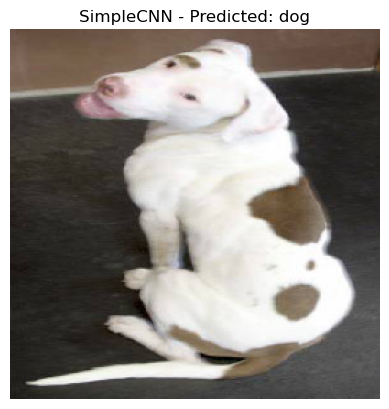

1/1 [==============================] - 1s 1s/step


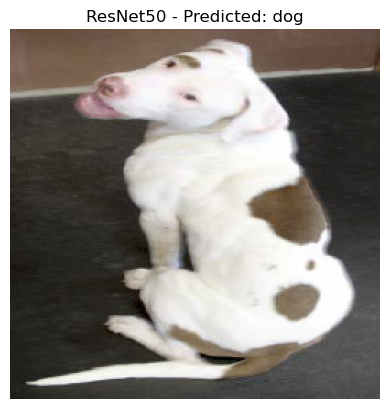

In [11]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directory containing the saved models
models_dir = 'content'

# List of model filenames
model_files = ['SimpleCNN.keras', 'ResNet50.keras']  # Add more model filenames as needed

# List to store loaded models
loaded_models = []

# Load each model
for model_file in model_files:
    model_path = os.path.join(models_dir, model_file)
    if os.path.exists(model_path):
        loaded_models.append(load_model(model_path))
    else:
        print(f"Error: Model file '{model_path}' not found.")

# Directory containing the test images
test_dir = 'cats_dogs_light\dog'

# Choose a random image from the list
random_image = random.choice(os.listdir(test_dir))

# Get the full path to the random image
image_path = os.path.join(test_dir, random_image)

# Load and preprocess the random image
img = load_img(image_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Make predictions using each model
for model_file, model in zip(model_files, loaded_models):
    # Get model name
    model_name = os.path.splitext(model_file)[0]

    # Make a prediction
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction, axis=1)
    predicted_class = "cat" if class_index[0] == 1 else "dog"  # Assuming 'dog' is class 1 and 'cat' is class 0

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} - Predicted: {predicted_class}')
    plt.show()


# Conclusion

CNN Model was able to provide an accuracy of 99 percent and ResNet50 was able to give upto 88 percent. ResNet50 needs a big dataset to be more accurate.
Other models such as VGGNet and AlexNet can be used to get this result.

# References
https://www.youtube.com/watch?v=jztwpsIzEGc

https://zenodo.org/records/5226945

https://github.com/keras-team/keras/issues/888

https://stackoverflow.com/questions/73693809/dividing-up-a-tensorflow-dataset

https://keras.io/api/applications/resnet/